# pip & import

In [1]:
!pip install micropip

In [2]:
!pip install matplotlib-venn

In [3]:
#hiddencell
import micropip
await micropip.install("seaborn")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [4]:
import os
import random
import numpy as np
import pandas as pd

In [5]:
!rm -rf ~/.cache/matplotlib

In [6]:
!sudo apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [7]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [9]:
plt.rc('font', family='NanumBarunGothic')
# 한글 폰트 사용 시 마이너스 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

# **대구 교통 사고 피해 예측 AI 경진대회**

## seed 고정 & 함수 정의


In [10]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

## **데이터 불러오기 및 상위행 확인**  

train.csv, test.csv 파일을 로드하여 상위행을 출력해 봅시다

In [11]:
train_org = pd.read_csv('train.csv')
test_org = pd.read_csv('test.csv')

In [12]:
train_df = train_org.copy()
test_df = test_org.copy()

In [13]:
train_df['시'] = train_df['시군구'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')
train_df['군'] = train_df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else '')
train_df['구'] = train_df['시군구'].apply(lambda x: x.split()[2] if len(x.split()) > 2 else '')

## EDA

In [14]:
train_org.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [25]:
train_org[train_org['중상자수'] != 0]['사망자수'].value_counts()

0    9426
1      42
2       5
Name: 사망자수, dtype: int64

In [15]:
for col in train_org.columns:
  print(train_org[col].value_counts())

ACCIDENT_00000    1
ACCIDENT_26408    1
ACCIDENT_26401    1
ACCIDENT_26402    1
ACCIDENT_26403    1
                 ..
ACCIDENT_13205    1
ACCIDENT_13206    1
ACCIDENT_13207    1
ACCIDENT_13208    1
ACCIDENT_39608    1
Name: ID, Length: 39609, dtype: int64
2019-11-15 18    13
2019-03-21 15    11
2020-01-06 18    11
2020-09-11 19    11
2019-12-20 18    10
                 ..
2020-12-15 17     1
2020-12-15 16     1
2019-10-29 20     1
2020-12-15 10     1
2021-12-31 23     1
Name: 사고일시, Length: 18057, dtype: int64
금요일    6179
화요일    6023
수요일    5969
월요일    5895
목요일    5759
토요일    5670
일요일    4114
Name: 요일, dtype: int64
맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: 기상상태, dtype: int64
대구광역시 남구 대명동      1749
대구광역시 수성구 범어동     1173
대구광역시 달서구 상인동     1143
대구광역시 서구 비산동       968
대구광역시 서구 내당동       938
                  ... 
대구광역시 중구 도원동         2
대구광역시 동구 신용동         2
대구광역시 중구 동성로1가       2
대구광역시 북구 도남동         2
대구광역시 동구 평광동         1
Name: 시군구, Length: 199, d

In [ ]:
for col in test_org.columns:
  print(test_org[col].value_counts())

ACCIDENT_39609    1
ACCIDENT_46921    1
ACCIDENT_46913    1
ACCIDENT_46914    1
ACCIDENT_46915    1
                 ..
ACCIDENT_43264    1
ACCIDENT_43265    1
ACCIDENT_43266    1
ACCIDENT_43267    1
ACCIDENT_50571    1
Name: ID, Length: 10963, dtype: int64
2022-11-10 18    10
2022-10-22 17    10
2022-11-27 18     9
2022-09-08 16     8
2022-09-16 18     8
                 ..
2022-08-25 18     1
2022-08-26 00     1
2022-08-26 07     1
2022-04-15 08     1
2022-12-31 21     1
Name: 사고일시, Length: 5548, dtype: int64
금요일    1743
토요일    1638
목요일    1636
화요일    1599
수요일    1592
월요일    1587
일요일    1168
Name: 요일, dtype: int64
맑음    10321
비       394
흐림      207
기타       31
눈        10
Name: 기상상태, dtype: int64
대구광역시 남구 대명동      422
대구광역시 수성구 범어동     351
대구광역시 달서구 상인동     315
대구광역시 수성구 만촌동     277
대구광역시 북구 산격동      264
                 ... 
대구광역시 북구 고성동1가      1
대구광역시 동구 능성동        1
대구광역시 중구 화전동        1
대구광역시 중구 서문로2가      1
대구광역시 중구 동성로1가      1
Name: 시군구, Length: 192, dtype: int64
단일로 - 기타    

In [ ]:
train_org[train_org['피해운전자 상해정도'] == "상해없음"]["ECLO"].value_counts()

3     1936
1     1093
5      631
6      246
9       76
8       75
10      46
4       39
12      32
2       20
7       14
11      14
15      12
13      10
18       8
14       6
16       4
17       4
21       4
20       2
47       1
26       1
28       1
30       1
32       1
19       1
24       1
74       1
39       1
Name: ECLO, dtype: int64

In [ ]:
train_org[train_org['피해운전자 상해정도'] == "상해없음"]["가해운전자 상해정도"].value_counts()

경상      1342
상해없음    1206
부상신고    1076
중상       503
기타불명     133
사망        21
Name: 가해운전자 상해정도, dtype: int64

In [ ]:
train_eda = train_org.copy()

In [ ]:
train_eda['노면상태'].value_counts()

건조       36420
젖음/습기     3100
기타          58
서리/결빙       25
침수           3
적설           3
Name: 노면상태, dtype: int64

In [ ]:
train_eda.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [ ]:
test_org.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')

In [ ]:
train_eda['기상상태'].value_counts()

맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: 기상상태, dtype: int64

In [ ]:
train_eda['가해운전자 차종'].value_counts()

승용             26705
이륜              4091
화물              4040
승합              1376
자전거             1234
기타불명             978
원동기              462
건설기계             425
개인형이동수단(PM)      172
특수               113
사륜오토바이(ATV)       10
농기계                3
Name: 가해운전자 차종, dtype: int64

In [ ]:
train_eda['법규위반'].value_counts()

안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: 법규위반, dtype: int64

In [ ]:
train_eda.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [ ]:
train_eda.loc[train_eda['피해운전자 연령'] == '98세 이상', '피해운전자 연령'] = '98세'
train_eda.loc[train_eda['피해운전자 연령'] == '90세 이상', '피해운전자 연령'] = '90세'
train_eda.loc[train_eda['피해운전자 연령'] == '미분류', '피해운전자 연령'] = '0세'

In [ ]:
train_eda['피해운전자 연령'].fillna('0세', inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)
print(train_eda['피해운전자 연령'].value_counts())

0세     1060
59세     867
57세     844
26세     816
50세     815
58세     809
60세     793
27세     792
48세     788
39세     783
28세     777
52세     771
49세     766
51세     750
25세     750
61세     741
47세     738
29세     728
37세     728
54세     727
56세     720
46세     718
55세     717
53세     712
38세     706
36세     679
30세     675
45세     670
44세     669
62세     668
31세     667
40세     663
41세     655
63세     647
24세     640
33세     636
23세     635
42세     633
34세     631
43세     627
35세     624
32세     620
22세     598
64세     567
65세     535
21세     488
66세     468
19세     456
20세     426
67세     400
68세     387
18세     378
69세     337
70세     315
71세     282
72세     274
17세     266
73세     247
74세     191
75세     181
76세     172
16세     161
77세     158
78세     153
79세     128
81세     112
8세      108
10세     107
80세     104
12세      98
7세       95
13세      95
9세       94
82세      89
11세      88
83세      86
15세      78
14세      71
84세      58
6세       49
85세      48
86세      40
5세       40
87세 

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
train_eda['피해운전자 연령'] = train_eda['피해운전자 연령'].apply(lambda x: int(x.replace('세', '')))

In [ ]:
average_age =int(train_eda['피해운전자 연령'].mean())
train_eda[train_eda['피해운전자 연령'] == 0] = average_age

In [ ]:
print(train_eda['피해운전자 연령'].value_counts())

43    1687
59     867
57     844
26     816
50     815
      ... 
91       4
93       2
94       2
92       1
98       1
Name: 피해운전자 연령, Length: 95, dtype: int64


In [ ]:
train_eda['피해운전자 연령']

0        70
1        61
2        38
3        36
4        52
         ..
39604    28
39605    52
39606    73
39607    57
39608    33
Name: 피해운전자 연령, Length: 39609, dtype: int64

In [ ]:
train_eda['ECLO']

0         5
1         3
2         3
3         5
4         3
         ..
39604     3
39605     3
39606    10
39607     3
39608     6
Name: ECLO, Length: 39609, dtype: int64

In [ ]:
train_eda.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [ ]:
train_eda['피해운전자 연령'].astype('float')

0        70.0
1        61.0
2        38.0
3        36.0
4        52.0
         ... 
39604    28.0
39605    52.0
39606    73.0
39607    57.0
39608    33.0
Name: 피해운전자 연령, Length: 39609, dtype: float64

<Axes: xlabel='피해운전자 연령', ylabel='ECLO'>

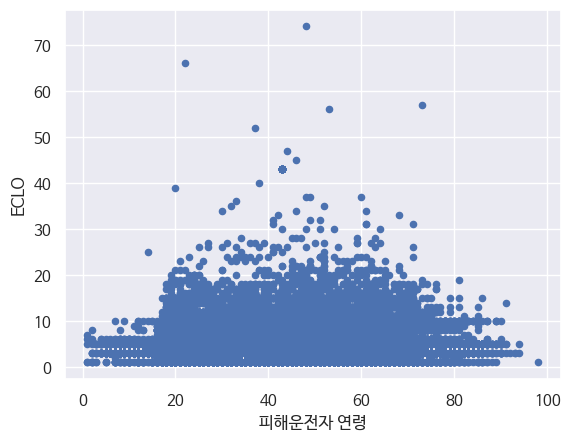

In [ ]:
train_eda.plot(kind='scatter', x='피해운전자 연령', y='ECLO')

In [ ]:
train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     39609 non-null  object
 15  피해운전자 성별     39609 non-null  object
 16  피해운전자 연령     39609 non-null  int64 
 17  피해운전자 상해정도   39609 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [ ]:
train_eda['법규위반'].value_counts()

안전운전불이행      20980
안전거리미확보       5260
신호위반          3783
교차로운행방법위반     2744
기타            1274
보행자보호의무위반     1154
43            1060
직진우회전진행방해      979
차로위반           949
중앙선침범          878
불법유턴           424
과속             124
Name: 법규위반, dtype: int64

In [ ]:
train_eda[train_eda['법규위반'] == "안전운전불이행"]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70,중상,0,1,0,0,5
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52,경상,0,0,1,0,3
5,ACCIDENT_00005,2019-01-01 04,화요일,맑음,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,35,경상,0,0,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39599,ACCIDENT_39599,2021-12-31 18,금요일,맑음,대구광역시 수성구 황금동,단일로 - 기타,건조,차대차,후진중충돌,안전운전불이행,...,상해없음,이륜,남,29,경상,0,0,1,0,3
39602,ACCIDENT_39602,2021-12-31 18,금요일,흐림,대구광역시 달서구 이곡동,교차로 - 교차로부근,건조,차대사람,기타,안전운전불이행,...,기타불명,보행자,남,32,경상,0,0,1,0,3
39603,ACCIDENT_39603,2021-12-31 19,금요일,맑음,대구광역시 동구 신천동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,여,56,경상,0,0,1,0,3
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57,경상,0,0,1,0,3


In [ ]:
train_eda['도로형태'].value_counts()

단일로 - 기타           19485
교차로 - 교차로안          9931
교차로 - 교차로부근         5746
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            236
단일로 - 교량             232
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: 도로형태, dtype: int64

In [ ]:
train_eda['사고유형'].value_counts()

차대차     31785
차대사람     6833
차량단독      991
Name: 사고유형, dtype: int64

In [ ]:
train_eda[train_eda['사고유형'] == "차대사람"]["피해운전자 상해정도"].value_counts()

경상      3650
중상      2420
부상신고     592
사망       120
상해없음      48
기타불명       3
Name: 피해운전자 상해정도, dtype: int64

In [ ]:
train_eda[train_eda['사고유형'] == "차대사람"]["사고유형 - 세부분류"].value_counts()

기타            2783
횡단중           2443
차도통행중          616
보도통행중          524
길가장자리구역통행중     467
Name: 사고유형 - 세부분류, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
train_eda['법규위반'].unique()

array(['안전운전불이행', '기타', '교차로운행방법위반', '신호위반', '중앙선침범', '안전거리미확보', '차로위반',
       '보행자보호의무위반', '직진우회전진행방해', '과속', '불법유턴'], dtype=object)

In [ ]:
train_eda['법규위반_숫자'] = label_encoder.fit_transform(train_eda['법규위반'])
train_eda['기상상태_숫자'] = label_encoder.fit_transform(train_eda['기상상태'])
train_eda['도로형태_숫자'] = label_encoder.fit_transform(train_eda['도로형태'])
train_eda['노면상태_숫자'] = label_encoder.fit_transform(train_eda['노면상태'])
train_eda['사고유형_숫자'] = label_encoder.fit_transform(train_eda['사고유형'])
train_eda['사고유형 - 세부분류_숫자'] = label_encoder.fit_transform(train_eda['사고유형 - 세부분류'])
train_eda['가해운전자 차종_숫자'] = label_encoder.fit_transform(train_eda['가해운전자 차종'])
train_eda['피해운전자 차종_숫자'] = label_encoder.fit_transform(train_eda['피해운전자 차종'])
train_eda['가해운전자 상해정도_숫자'] = label_encoder.fit_transform(train_eda['가해운전자 상해정도'])
train_eda['피해운전자 상해정도_숫자'] = label_encoder.fit_transform(train_eda['피해운전자 상해정도'])

In [ ]:
train_eda_number = train_eda.select_dtypes(include=np.number)
train_eda_tmp = train_eda_number
train_eda_number.columns

Index(['사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '법규위반_숫자', '기상상태_숫자', '도로형태_숫자',
       '노면상태_숫자', '사고유형_숫자', '사고유형 - 세부분류_숫자', '가해운전자 차종_숫자', '피해운전자 차종_숫자',
       '가해운전자 상해정도_숫자', '피해운전자 상해정도_숫자'],
      dtype='object')

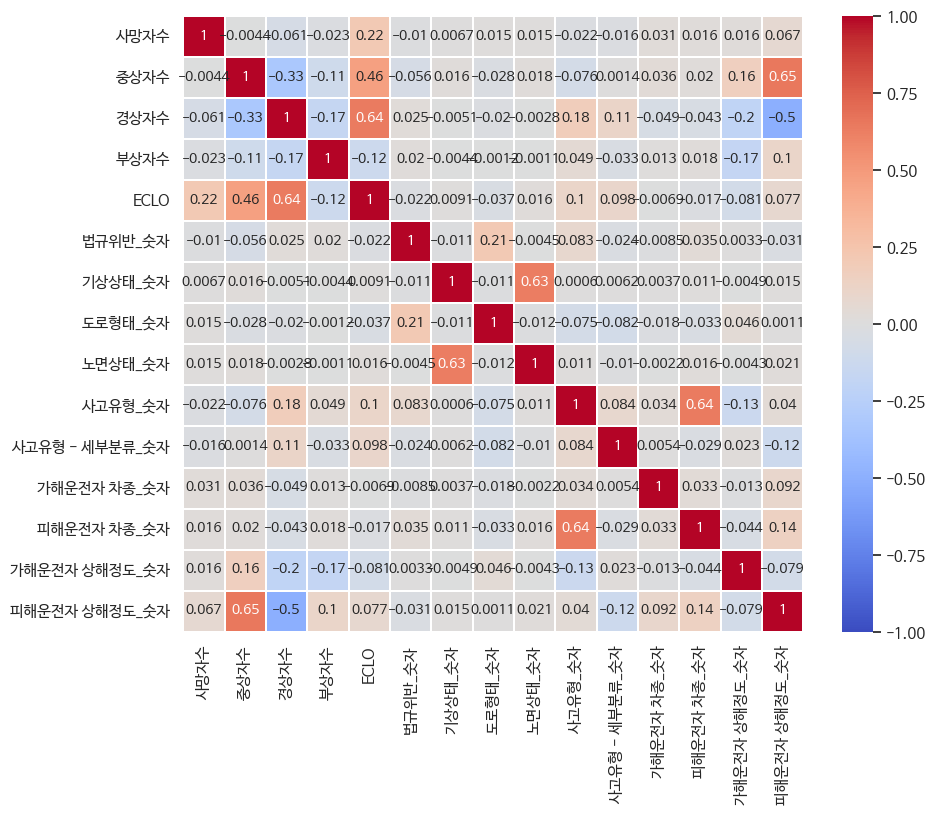

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 나눔 바른고딕 폰트 설정
sns.set(font="NanumBarunGothic")

# 그래프의 기본 폰트 설정
plt.rcParams["font.family"] = 'NanumBarunGothic'

# 히트맵 생성 코드
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(train_eda_tmp.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='coolwarm')

# 각 셀의 텍스트에 대한 폰트 설정
for text in heatmap.texts:
    text.set_fontsize(10)  # 폰트 크기를 원하는 크기로 조절하세요

# 플롯 보여주기
plt.show()

In [ ]:
train_eda["사고일시"]

0        2019-01-01 00
1        2019-01-01 00
2        2019-01-01 01
3        2019-01-01 02
4        2019-01-01 04
             ...      
39604    2021-12-31 19
39605    2021-12-31 19
39606    2021-12-31 21
39607    2021-12-31 22
39608    2021-12-31 23
Name: 사고일시, Length: 39609, dtype: object

In [ ]:
train_eda["사고일시"] = pd.to_datetime(train_eda["사고일시"])
train_eda["사고년도"] = train_eda["사고일시"].dt.year
train_eda["사고월"] = train_eda["사고일시"].dt.month
train_eda['사고시간'] = train_eda["사고일시"].dt.hour
train_eda = train_eda.drop('사고일시',axis=1)

In [ ]:
train_eda["시군구"].value_counts()

대구광역시 남구 대명동      1749
대구광역시 수성구 범어동     1173
대구광역시 달서구 상인동     1143
대구광역시 서구 비산동       968
대구광역시 서구 내당동       938
                  ... 
대구광역시 중구 도원동         2
대구광역시 동구 신용동         2
대구광역시 중구 동성로1가       2
대구광역시 북구 도남동         2
대구광역시 동구 평광동         1
Name: 시군구, Length: 199, dtype: int64

In [ ]:
train_eda["사고유형"].value_counts()

차대차     31785
차대사람     6833
차량단독      991
Name: 사고유형, dtype: int64

In [ ]:
train_eda["사고시간"].value_counts()

18    3398
17    2772
19    2739
16    2529
15    2374
14    2342
13    2198
20    2154
12    2104
11    2016
8     1924
10    1803
21    1749
9     1735
22    1506
7     1213
23    1096
0      828
6      750
1      669
2      520
5      467
4      367
3      356
Name: 사고시간, dtype: int64

In [ ]:
train_eda[train_eda["사망자수"] != 0]["사망자수"].value_counts()

1    292
2      8
Name: 사망자수, dtype: int64

In [ ]:
train_eda[train_eda["사망자수"] != 0]["기상상태"].value_counts()

맑음    259
비      34
흐림      5
기타      1
눈       1
Name: 기상상태, dtype: int64

In [ ]:
train_eda[train_eda["사망자수"] != 0]["사고유형"].value_counts()

차대차     133
차대사람    124
차량단독     43
Name: 사고유형, dtype: int64

In [ ]:
palette = sns.color_palette("pastel")
sns.set_palette(palette=palette)

In [ ]:
train_org.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

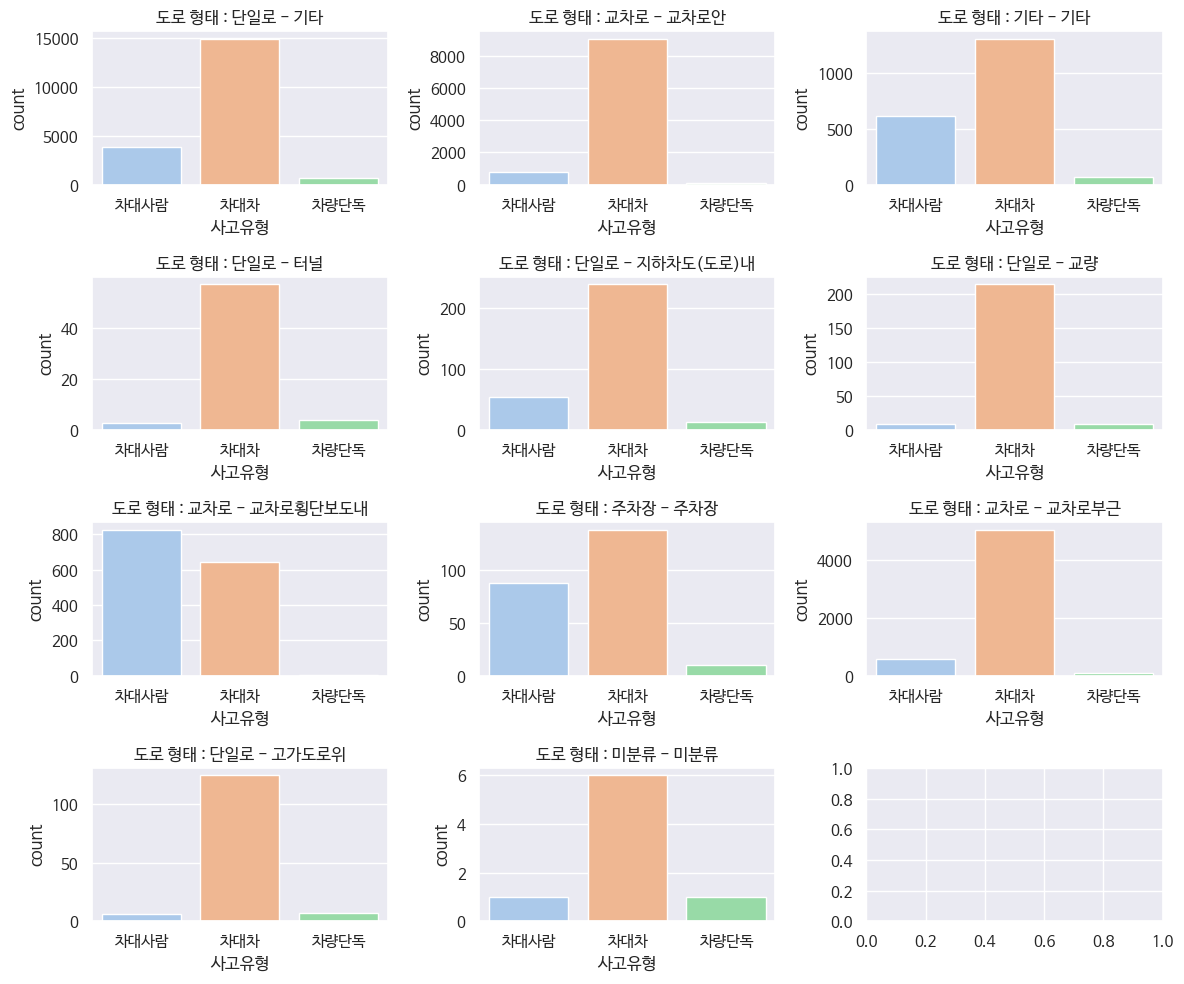

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_org['사고유형'].unique()

for (ax, k) in zip(axes.flatten(), train_org['도로형태'].unique()):
    sns.countplot(x='사고유형', data=train_org[train_org['도로형태'] == k], ax=ax, order=x_order)
    ax.set_title(f"도로 형태 : {k}")

plt.tight_layout()
plt.show()

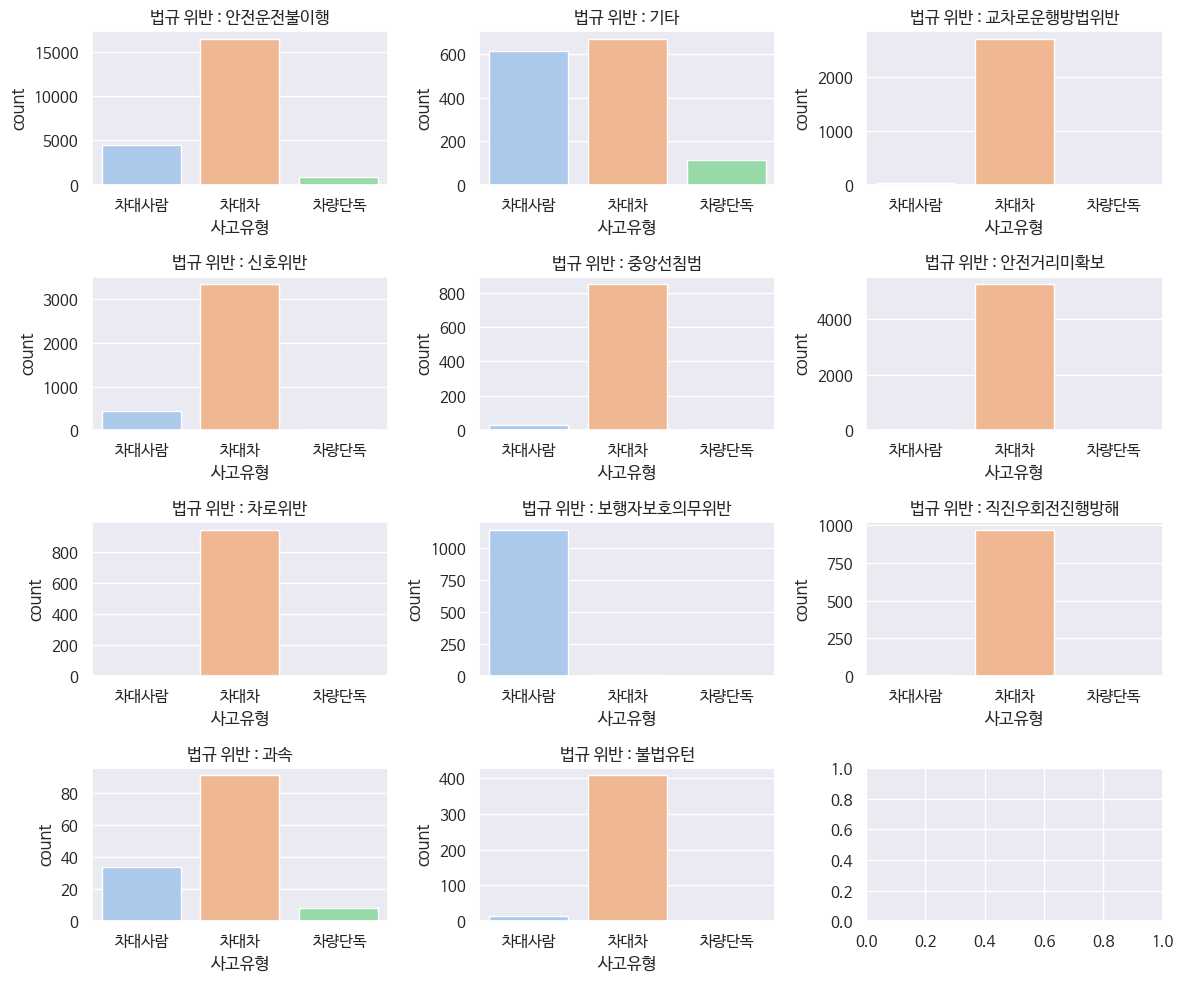

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_org['사고유형'].unique()

for (ax, k) in zip(axes.flatten(), train_org['법규위반'].unique()):
    sns.countplot(x='사고유형', data=train_org[train_org['법규위반'] == k], ax=ax, order=x_order)
    ax.set_title(f"법규 위반 : {k}")

plt.tight_layout()
plt.show()

In [ ]:
train_org['요일'].unique()

array(['화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '월요일'], dtype=object)

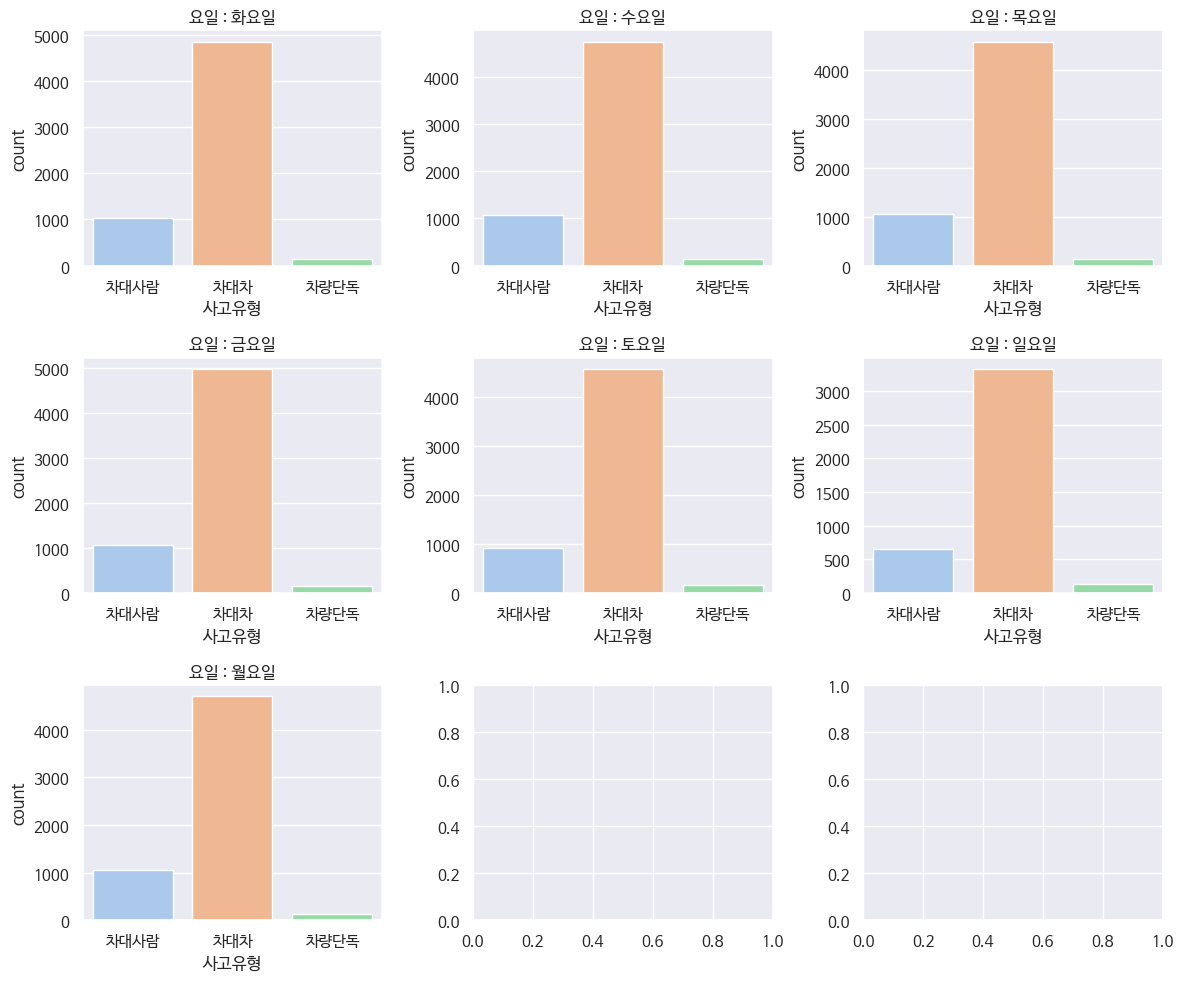

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_org['사고유형'].unique()

for (ax, k) in zip(axes.flatten(), train_org['요일'].unique()):
    sns.countplot(x='사고유형', data=train_org[train_org['요일'] == k], ax=ax, order=x_order)
    ax.set_title(f"요일 : {k}")

plt.tight_layout()
plt.show()

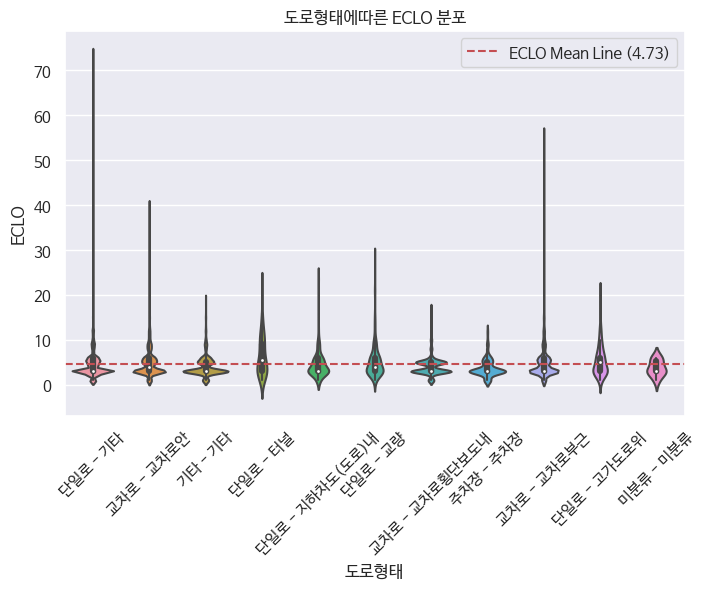

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='도로형태', y='ECLO', data=train_org)
avg = train_org['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("도로형태에따른 ECLO 분포")
plt.show()

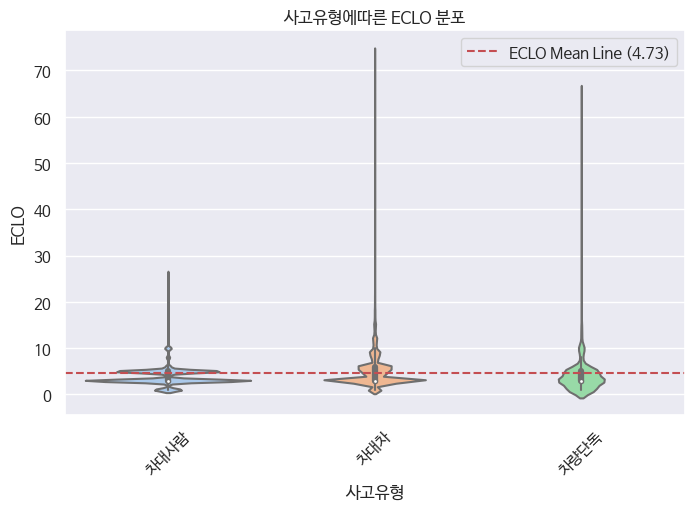

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='사고유형', y='ECLO', data=train_org)
avg = train_org['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("사고유형에따른 ECLO 분포")
plt.show()

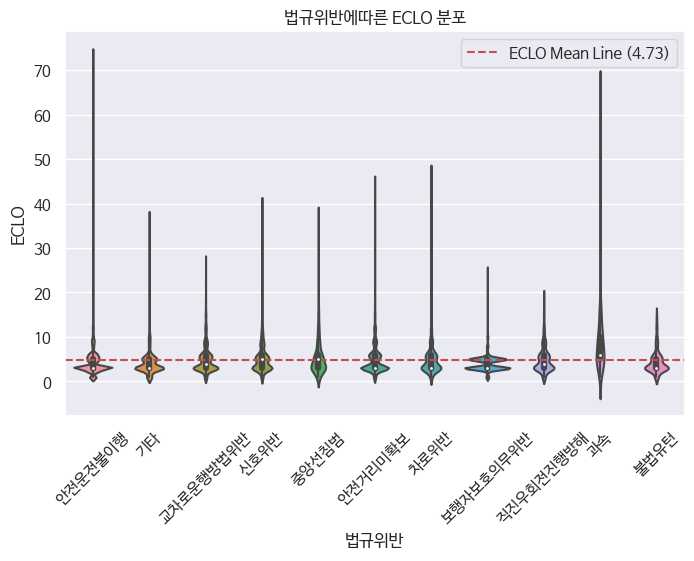

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='법규위반', y='ECLO', data=train_org)
avg = train_org['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("법규위반에따른 ECLO 분포")
plt.show()

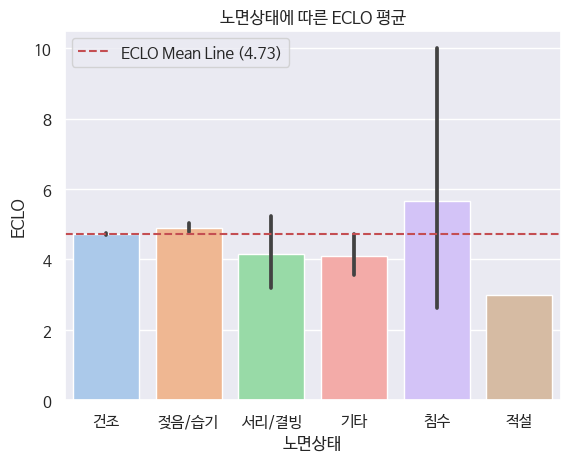

In [ ]:
sns.barplot(x='노면상태', y='ECLO', data=train_org)
avg = train_org['ECLO'].mean()
plt.axhline(avg, ls='--', label=f'ECLO Mean Line ({round(avg,2)})', color='r')
plt.legend()
plt.title("노면상태에 따른 ECLO 평균")
plt.show()

### 범주형_EDA

In [ ]:
train_eda_object = train_eda.select_dtypes(include='object')
train_eda_object.columns

Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',
       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도'],
      dtype='object')

In [ ]:
train_eda_object

,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,ACCIDENT_00000,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상
1,ACCIDENT_00001,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상
2,ACCIDENT_00002,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상
3,ACCIDENT_00003,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상
4,ACCIDENT_00004,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상
39605,ACCIDENT_39605,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상
39606,ACCIDENT_39606,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상
39607,ACCIDENT_39607,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상


In [ ]:
train_eda_object["기상상태"] = train_eda_object["기상상태"].astype("category")

In [ ]:
train_eda_object.describe()

,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
count,39609,39609,39609,39609,39609,39609,39609,39609,39609,39609,39609,39609,39609,38618,38618,38618,38618
unique,39609,7,6,199,11,6,3,14,11,12,3,89,6,13,3,97,6
top,ACCIDENT_00000,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,승용,남,60세,상해없음,승용,남,59세,경상
freq,1,6179,36181,1749,19485,36420,31785,17104,21876,26705,29052,1031,29309,20315,27505,867,25034


In [ ]:
train_eda_object['가해운전자 상해정도'].nunique()

6

In [ ]:
train_eda_object['피해운전자 상해정도'].mode()

0    경상
Name: 피해운전자 상해정도, dtype: object

In [ ]:
train_eda_object['가해운전자 상해정도'].mode()

0    상해없음
Name: 가해운전자 상해정도, dtype: object

In [ ]:
train_eda_object["기상상태"]

0        맑음
1        흐림
2        맑음
3        맑음
4        맑음
         ..
39604    맑음
39605    맑음
39606    맑음
39607    맑음
39608    맑음
Name: 기상상태, Length: 39609, dtype: category
Categories (6, object): ['기타', '눈', '맑음', '비', '안개', '흐림']

## **train, test 데이터 기간 확인하기**  

학습(train) 데이터의 기간과 예측 대상이 되는 test 데이터의 기간을 살펴 봅니다

In [ ]:
display(f"train : {train_org.iloc[0]['사고일시']} ~ {train_org.iloc[-1]['사고일시']}")
display(f"test : {test_org.iloc[0]['사고일시']} ~ {test_org.iloc[-1]['사고일시']}")

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

In [ ]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0


## **데이터 전처리**  

현재 '사고일시', '시군구', '도로형태' 컬럼은 반복되는 패턴으로 여러 정보를 포함하고 있습니다
이런 반복되는 패턴을 일반화하면 pandas에서 제공하는 str.extract를 통해 한 번에 추출 가능합니다  

## **파생 변수 생성 1 : 날짜, 시간정보 생성**

'사고일시' 컬럼으로 부터 연도, 월, 일, 시간 정보 추출 및 변환 합니다

In [ ]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

## **파생 변수 생성 2 : 공간(위치) 정보 생성**

'시군구' 컬럼으로부터 의미 있는 공산 정보를 추출 및 변환 합니다

In [ ]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간', '도시', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시',\n       '구', '동'],\n      dtype='object')"

## **파생 변수 추출 3 : 도로 형태 정보 추출**  

'도로형태' 컬럼은 '단일로 - 기타'와 같은 패턴으로 구성되어 있습니다. 이를 두종류의 독립된 정보로 보고 두개의 컬럼으로 분리하여 생성합니다.

In [ ]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '시',\n       '군', '구', '연', '월', '일', '시간', '도시', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

## **전처리 결과 확인**

지금까지 전처리한 결과를 확인해 봅시다

In [ ]:
train_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '시',
       '군', '구', '연', '월', '일', '시간', '도시', '동', '도로형태1', '도로형태2'],
      dtype='object')

In [ ]:
test_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',
       '도로형태1', '도로형태2'],
      dtype='object')

In [ ]:
test_features = test_df.drop(columns=['ID']).copy()
train_features = train_df[test_features.columns].copy()
train_target = train_df['ECLO'].copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(train_features.dtypes[train_features.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_features[i])
    train_features[i]=le.transform(train_features[i])

    for case in np.unique(test_features[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_features[i]=le.transform(test_features[i])

display(train_features.head())
display(test_features.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,6,2,0,0,2019,1,1,0,0,7,40,2,5
1,6,5,0,0,2019,1,1,0,0,1,4,2,5
2,6,2,0,0,2019,1,1,1,0,6,66,2,5
3,6,2,0,1,2019,1,1,2,0,4,79,2,5
4,6,2,0,1,2019,1,1,4,0,3,129,2,5


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,5,2,0,0,2022,1,1,1,0,6,99,0,3
1,5,2,0,0,2022,1,1,1,0,6,168,2,5
2,5,2,0,1,2022,1,1,4,0,6,117,0,3
3,5,2,0,1,2022,1,1,4,0,6,126,2,5
4,5,2,0,1,2022,1,1,6,0,1,4,0,3


## K-Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [ ]:
# 교차 검증
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)

## Light GBM

### model 0

In [ ]:
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_squared_error

In [ ]:
seed_everything(42)
hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose' : -1
}
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []
rmse_lst = []
for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  tr_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  tr_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(tr_x, tr_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.169669388589732
2 번째 Stratified K-Fold RMSE: 3.1224849138755624
3 번째 Stratified K-Fold RMSE: 3.157991102752282
4 번째 Stratified K-Fold RMSE: 3.1284738282525915
5 번째 Stratified K-Fold RMSE: 3.197864856763529
6 번째 Stratified K-Fold RMSE: 3.170766157068614
--------------------------------------------------
교차 검증 RMSE: 3.1578750412170518


In [ ]:
model = LGBMRegressor(**hp)
n_iter=3 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(2,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(1000,2000,200, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -0.8, 20)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=3)
# 학습 (best hp 조합 찾기)
rs1.fit(train_features, train_target)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

Fitting 6 folds for each of 3 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


-3.164659170008457

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 1301, 'max_depth': 7, 'learning_rate': 0.001}

In [ ]:
best_params.keys

<function dict.keys>

In [ ]:
hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 31,
    #'learning_rate': 0.05,
    'verbose' : -1,
    'n_estimators': 1473, 'max_depth': 7, 'learning_rate': 0.032008340465997674
}
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  tr_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  tr_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(tr_x, tr_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.202359706895726
2 번째 Stratified K-Fold RMSE: 3.1619724153241813
3 번째 Stratified K-Fold RMSE: 3.2135031843628488
4 번째 Stratified K-Fold RMSE: 3.178569284508995
5 번째 Stratified K-Fold RMSE: 3.2465910908907
6 번째 Stratified K-Fold RMSE: 3.216704282479209
--------------------------------------------------
교차 검증 RMSE: 3.203283327410277


### model 1

In [ ]:
hp = {
    "random_state" : 42,
    'verbose' : -1
}
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.1708119113494386
2 번째 Stratified K-Fold RMSE: 3.1246687240279516
3 번째 Stratified K-Fold RMSE: 3.163598885443988
4 번째 Stratified K-Fold RMSE: 3.134387742786986
5 번째 Stratified K-Fold RMSE: 3.205449029582139
6 번째 Stratified K-Fold RMSE: 3.1764365553818883
--------------------------------------------------
교차 검증 RMSE: 3.182921067752838


## train_y, pred RMSE

In [ ]:
model

LGBMRegressor(random_state=42, verbose=-1)

In [ ]:
pred = model.predict(train_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))
print(f'RMSE: {rmse}')

RMSE: 3.0023497872185816


In [ ]:
pred_df = pd.DataFrame(pred, columns=['ECLO'])

# 학습 평가

## 산포도

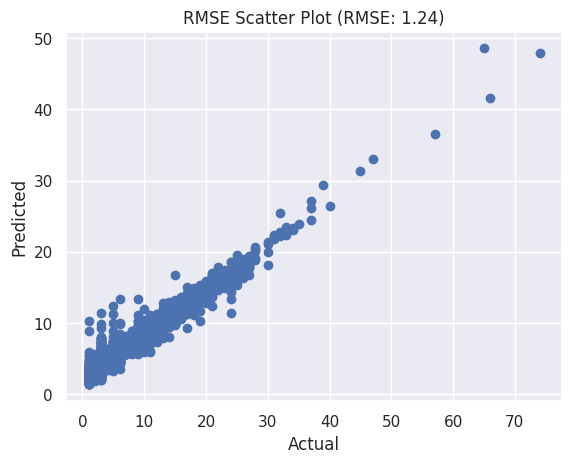

In [ ]:
import matplotlib.pyplot as plt

# train_y와 pred의 RMSE를 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))

# 산포도 그래프 생성
plt.scatter(train_y, pred)

# 그래프에 제목과 x축, y축 레이블 추가
plt.title(f'RMSE Scatter Plot (RMSE: {rmse:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 그래프 표시
plt.show()

## **Submission 양식 확인**

sample_submission.csv 화일 데이터(sample_submission)를 그대로 복사한 후,
양식의 'ECLO' 컬럼에 test_x에 대한 ECLO(y) 예측값을 입력합니다

In [ ]:
prediction =  model.predict(test_features)

In [ ]:
baseline_submission = sample_submission.copy()
baseline_submission['ECLO'] = prediction
baseline_submission

,ID,ECLO
0,ACCIDENT_39609,5.11
1,ACCIDENT_39610,4.19
2,ACCIDENT_39611,7.70
3,ACCIDENT_39612,8.19
4,ACCIDENT_39613,5.78
...,...,...
10958,ACCIDENT_50567,7.55
10959,ACCIDENT_50568,4.71
10960,ACCIDENT_50569,5.38
10961,ACCIDENT_50570,5.74


## **답안지 저장 및 제출하기**

In [ ]:
baseline_submission.to_csv('Hyul_submit.csv', index=False)